In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib
# %matplotlib inline

from rover_simulator.world import World
from rover_simulator.rover import BasicRover, KalmanRover
from rover_simulator.history import *
from rover_simulator.navigation.localizer import NoisyLocalizer
from rover_simulator.navigation.controller import ConstantSpeedController

In [2]:
world = World(end_step=200)
world.read_objects("../rover_simulator/examples/environment_simple.txt")

In [3]:
# rover = BasicRover(
#     np.array([1.0, 1.0, 0.0]), 0.5,
#     localizer=NoisyLocalizer(),
#     controller=ConstantSpeedController(w=np.pi/32),
#     history=History()
# )
rover = KalmanRover(
    np.array([1.0, 1.0, 0.0]), 0.5,
    controller=ConstantSpeedController(w=np.pi/32),
    history=HistoryWithKalmanFilter()
)
world.append_rover(rover)

In [4]:
world.simulate()

  0%|          | 0/200 [00:00<?, ?it/s]

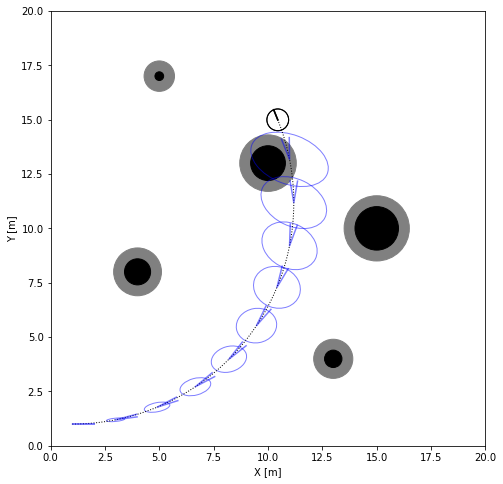

In [5]:
history.plot(
    xlim=[0, 20], ylim=[0, 20],
    obstacles=world.obstacles, enlarge_obstacle=rover.r,
    draw_sensing_points=False,
    draw_sensing_area=False
)

  0%|          | 0/200 [00:00<?, ?it/s]

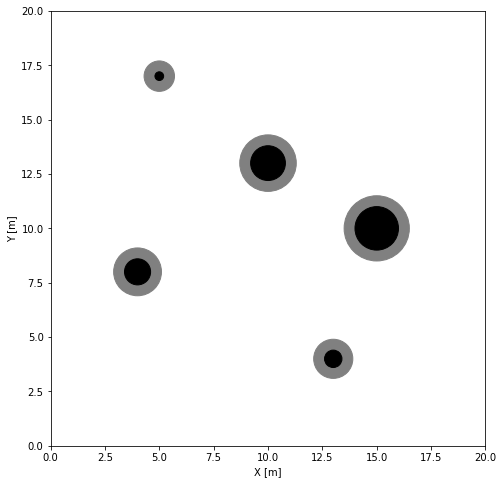

In [6]:
history.animate(
    xlim=[0, 20], ylim=[0, 20],
    obstacles=world.obstacles,
    draw_sensing_points=False,
    draw_sensing_area=False,
    enlarge_obstacle=rover.r,
    # save_path="log/kalman_localizer.mp4",
    debug=False
)

In [5]:
len(rover.history.estimated_poses_cov)

200